# IMDb India Movies

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [183]:
movie = pd.read_csv('Movies.csv',encoding='latin-1')

In [184]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Step 1: Cleaning Data

1. Removing rows with Year, Rating and Duration as Null.
2. Removing extra '()' from column Year.
3. Removing value 'min' from column Duration as all values are in minutes
4. Correct the data type of column Votes
5. Removing rows with Director, Actor 1, Actor 2 and Actor 3, Genre as Null.
6. Convert Duration column to float

In [185]:
movie.Year.isnull().sum()

528

In [186]:
#removing columns with movie Year as Null
movie = movie[movie.Year.isnull()==False]
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
movie.Duration.isnull().sum()

7866

In [188]:
#removing columns with movie Duration as Null
movie = movie[movie.Duration.isnull()==False]
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [189]:
movie.Rating.isnull().sum()

1264

In [190]:
#removing columns with Rating as Null
movie = movie[movie.Rating.isnull()==False]
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [191]:
#removing extra () from column year:
movie['Year'] = movie.Year.str.replace('(','').str.replace(')','')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [192]:
movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [193]:
#removing 'min' from column Duration:
movie['Duration'] = movie.Duration.str.replace('min','')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [194]:
movie.Votes.dtype

dtype('O')

In [195]:
#removing ',' in Votes column due to which we are unable to convert it to int
movie['Votes']=movie.Votes.str.replace(',','')

In [196]:
#Converting Votes column to type 'int'
movie['Votes'] = movie.Votes.astype('int32')

In [197]:
movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [198]:
movie.Director.isnull().sum()

1

In [199]:
#removing column where Director is null:
movie = movie[~movie.Director.isnull()]

In [200]:
movie['Actor 1'].isnull().sum()

74

In [201]:
#removing columns where Actors are null:
movie = movie[~(movie['Actor 1'].isnull()) & ~(movie['Actor 2'].isnull()) & ~(movie['Actor 3'].isnull()) & 
              ~(movie['Genre'].isnull())]

In [202]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [203]:
#Converting Duration column to type 'int'
movie['Duration'] = movie.Duration.astype('float')

In [204]:
movie.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Step 2: Analysis

1. Years with top Ratings

In [205]:
movie = movie.sort_values(by='Rating',ascending=False)
best_movies = movie[movie.Rating >= 9.0]

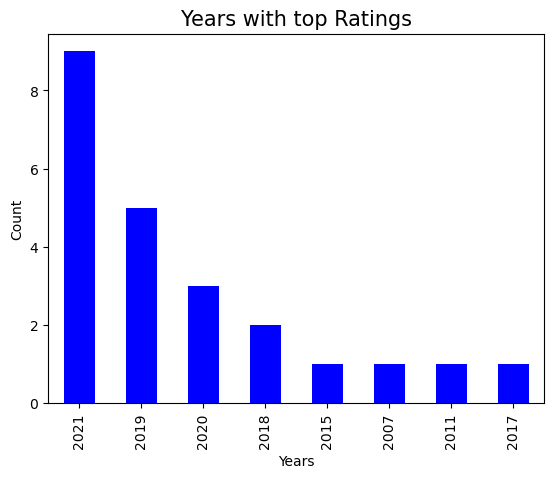

In [206]:
#year with best Ratings:
plt.style.use('default')
best_movies['Year'].value_counts().plot.bar(color='b')
plt.title('Years with top Ratings',fontsize=15)
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

From the barplot plotted above, it can be seen that the year 2021 had some of the best rated movies among top 20 rated movies.

2. Relationship between Duration and Rating of the movies:

- created a new column with rounded off ratings
- checked relationship between ratings and duration using heat map

In [207]:
movie['Rating_rounded'] = movie.Rating.round(0)

In [208]:
piv = movie.pivot_table(index=movie.Rating_rounded,values=['Duration'], aggfunc='mean')
piv

,Duration
Rating_rounded,
1.0,136.500000
2.0,129.263889
3.0,126.951754
4.0,132.688732
5.0,136.195426
6.0,133.500000
7.0,134.556348
8.0,132.322581
9.0,110.946429


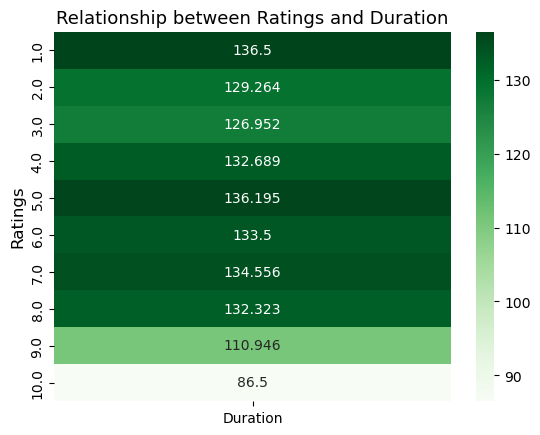

In [209]:
sns.heatmap(piv,annot=True,cmap='Greens',fmt='1g')
plt.title('Relationship between Ratings and Duration',fontsize=13)
plt.ylabel('Ratings',fontsize=12)
plt.show()

From the heatmap plotted above, it can be inferred that movies with the top ratings are rather shorter in Duration than the ones having lesser ratings.

The top ratings 10 and 9 after being rounded off has the lowest average duration with 86.5 and 110.946 respectively.

3. Top 10 movies according to rating per year and overall.

In [29]:
top10_peryear = movie.drop_duplicates(subset=['Year'],keep='first')

In [30]:
#top 10 movies according to Rating per year:
top10_peryear =top10_peryear.sort_values(by='Rating',ascending=False)
top10_peryear[['Name','Year','Rating']].head(10)

,Name,Year,Rating
8339,Love Qubool Hai,2020,10.0
5410,Half Songs,2021,9.7
5077,Gho Gho Rani,2019,9.4
1314,Ashok Vatika,2018,9.3
14071,The Flip Side: A Truth That Could Not Reach You,2015,9.2
6025,I'm in Love,2007,9.2
10217,Nirvana13,2011,9.1
11841,Rediscovering India,2017,9.0
8188,Leaving Home: The Life and Music of Indian Ocean,2008,8.9
4953,Gauru: Journey of Courage,2016,8.8


In [31]:
#top 10 movies overall:
best_movies.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64.0,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101.0,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56.0,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65.0,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


4. Number of popular movies released each year.

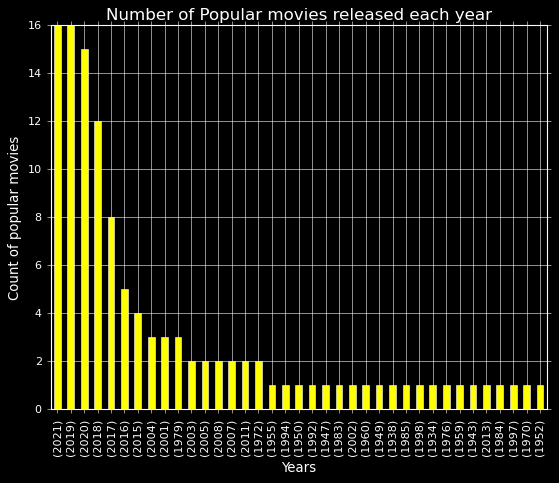

In [145]:
#number of popular movies released each year:
popular = movie[movie.Rating>=8.5]
plt.style.use('dark_background')
popular.Year.value_counts().plot.bar(color='yellow')
plt.title('Number of Popular movies released each year',fontsize=15)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Count of popular movies',fontsize=12)
plt.show()

The most popular movies were released in the year 2021 followed by 2019.

5. Counting the number of votes which movies performed better in rating per year and overall. 

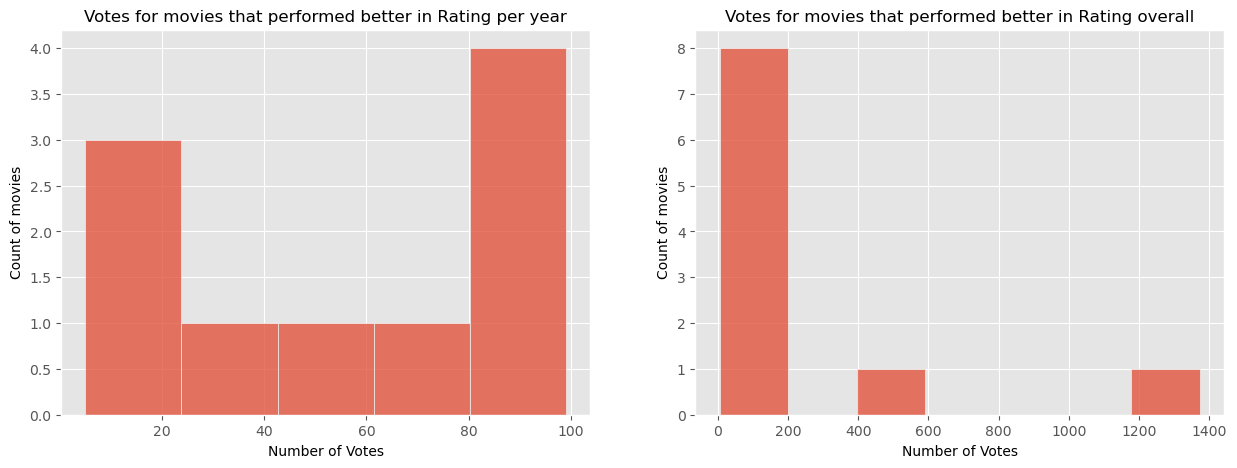

In [33]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.histplot(top10_peryear.head(10).Votes,bins=5)
plt.title('Votes for movies that performed better in Rating per year',fontsize=12)
plt.ylabel('Count of movies')
plt.xlabel('Number of Votes')


plt.subplot(1,2,2)
sns.histplot(best_movies.head(10).Votes,bins=7)
plt.title('Votes for movies that performed better in Rating overall',fontsize=12)
plt.ylabel('Count of movies')
plt.xlabel('Number of Votes')
plt.show()

From the histograms above it can be inferred that for movies that have the best rating per year, the maximum number of votes fall in the range 80-100,followed by 0-20.

And for movies that have highest rating overall, most of the votes fall in the range of 0-200. 

6. Which director directed the most movies

In [34]:
listc = movie.Director.value_counts()
df1=pd.DataFrame(listc)

In [35]:
df1.reset_index(inplace=True)
df1.rename(columns={'Director':'Count'},inplace=True)

In [36]:
df1.rename(columns={'index':'Director'},inplace=True)

In [37]:
df1=df1[df1.Count>30]
df1

,Director,Count
0,David Dhawan,41
1,Mahesh Bhatt,39
2,Shakti Samanta,33
3,Hrishikesh Mukherjee,33
4,Ram Gopal Varma,33


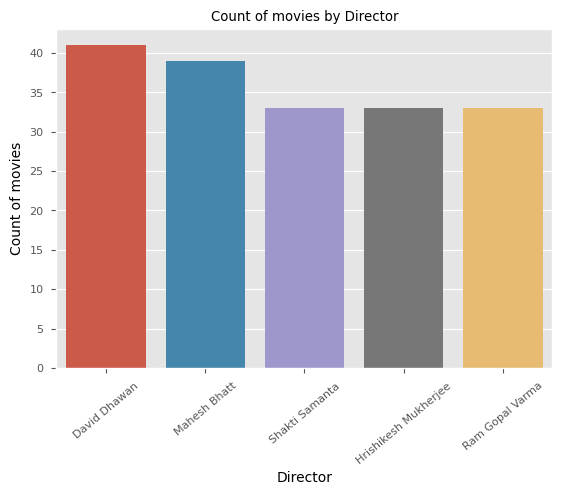

In [38]:
plt.style.use('seaborn-v0_8-paper')
sns.barplot(df1,x='Director',y='Count')
plt.title('Count of movies by Director')
plt.xticks(rotation = 40)
plt.ylabel('Count of movies')
plt.show()

David Dhawan has directed most movies.

7. Which actor starred in the movie

In [39]:
actors = movie[movie['Director']=='David Dhawan']
actors = actors[['Actor 1','Actor 2','Actor 3']]

In [40]:
list1 = actors['Actor 1'].value_counts()
df = pd.DataFrame(list1)
df.rename(columns={'Actor 1':'Count'},inplace=True)

list2 = actors['Actor 2'].value_counts()
df2 = pd.DataFrame(list2)
df2.rename(columns={'Actor 2':'Count'},inplace=True)

list3 = actors['Actor 3'].value_counts()
df3 = pd.DataFrame(list3)
df3.rename(columns={'Actor 3':'Count'},inplace=True)

In [41]:
df_add = df.add(df2,fill_value=0,axis=0).add(df3,fill_value=0,axis=1)
df_add =df_add.sort_values(by='Count',ascending=False)

In [42]:
df_add = df_add.head()
df_add

,Count
Govinda,16.0
Karisma Kapoor,10.0
Salman Khan,8.0
Juhi Chawla,6.0
Sanjay Dutt,5.0


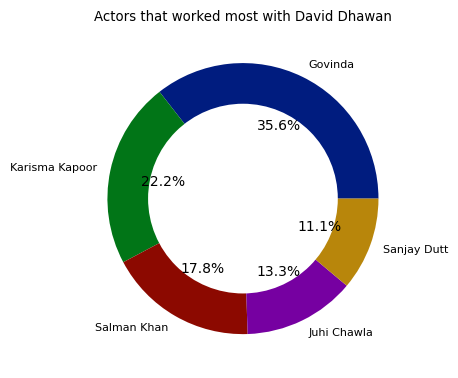

In [43]:
plt.style.use('seaborn-v0_8-dark-palette')
plt.pie(df_add['Count'], labels=df_add.index,autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Actors that worked most with David Dhawan')
plt.show()

Govinda and Karishma Kapoor have worked more with David Dhawan

Any other trends you can find:

7. Popular Genres based on Ratings:

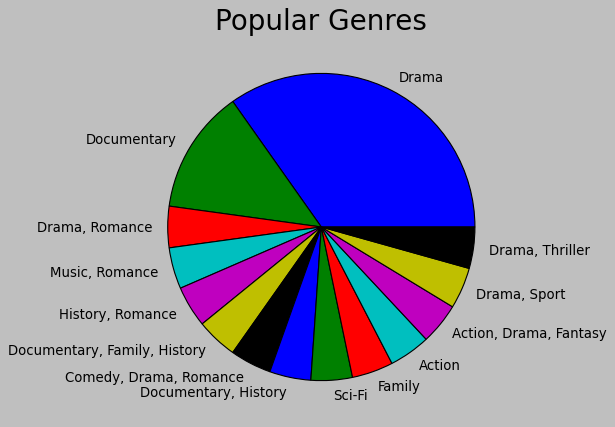

In [44]:
plt.style.use('classic')
best_movies.Genre.value_counts().plot.pie()
plt.title('Popular Genres',fontsize=25)
plt.ylabel('')
plt.show()

The most popular Genres according to Ratings are 'Drama' and 'Documentary'.

# Step 3: Prediction Model

Model Training:
1. Training using categorical columns: Genre, Director and Actor 1
2. Training using numerical columns: Year, Duration and Votes

In [56]:
#importing necessary libraries to implement linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1. Training using categorical columns: (dataset used is best_movies which contains movies with Ratings >= 9.0)

In [169]:
bestnew = pd.get_dummies(best_movies, columns= ['Genre','Director','Actor 1'])

In [170]:
bestnew.dtypes

Name                          object
Year                          object
Duration                     float64
Rating                       float64
Votes                          int32
                              ...   
Actor 1_Tejaswini Manogna      uint8
Actor 1_Vaibhav Khisti         uint8
Actor 1_Victor Banerjee        uint8
Actor 1_Vijay Mahar            uint8
Actor 1_Vishwa Bhanu           uint8
Length: 67, dtype: object

In [171]:
bestnew_x = bestnew.drop(['Rating','Name','Actor 2','Actor 3'],axis=1)
bestnew_y = pd.DataFrame(bestnew['Rating'])

In [172]:
bestnew_y.columns
bestnew_x.columns

Index(['Year', 'Duration', 'Votes', 'Genre_Action',
       'Genre_Action, Drama, Fantasy', 'Genre_Comedy, Drama, Romance',
       'Genre_Documentary', 'Genre_Documentary, Family, History',
       'Genre_Documentary, History', 'Genre_Drama', 'Genre_Drama, Romance',
       'Genre_Drama, Sport', 'Genre_Drama, Thriller', 'Genre_Family',
       'Genre_History, Romance', 'Genre_Music, Romance', 'Genre_Sci-Fi',
       'Director_Arvind Pratap', 'Director_Aryan Neeraaj Anand',
       'Director_Gautam Joshi', 'Director_Jitin Rawat',
       'Director_Meenal Dixit', 'Director_Munni Pankaj',
       'Director_Nikhil Mahar', 'Director_Prabu Solomon',
       'Director_Raghav Jairath', 'Director_Rahul Mallick',
       'Director_S. Sunil', 'Director_Saif Ali Sayeed',
       'Director_Sandeep Mohan', 'Director_Sapna Bhavnani',
       'Director_Shadab Ahmad', 'Director_Sriram Raja',
       'Director_Sudha Kongara', 'Director_Suhrud Godbole',
       'Director_Susant Misra', 'Director_Tom Alter', 'Director_

In [173]:
x_train, x_test, y_train, y_test = train_test_split(bestnew_x,bestnew_y, test_size=0.3,random_state=1000)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16, 63)
(16, 1)
(7, 63)
(7, 1)


In [174]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [175]:
y_pred = regr.predict(x_test)
y_pred

array([[9.1704852 ],
       [9.20285878],
       [9.16779823],
       [9.35085462],
       [9.30277803],
       [9.21659903],
       [9.20286334]])

In [176]:
y_test

,Rating
1314,9.3
9504,9.0
14222,9.4
13231,9.3
15071,9.0
11841,9.0
6852,9.4


In [217]:
regr.score(x_test,y_test)

-0.32673709554236785

2. Training using numerical columns: (dataset used is movies which consists of the original movies data)

In [210]:
#columns used to train data:
train1 = movie[['Year','Duration','Votes']]

In [211]:
#columns used to predict data:
test1 = movie['Rating']

In [212]:
x_train1, x_test1, y_train1,y_test1 = train_test_split(train1,test1,test_size=0.2,random_state=1000)

In [213]:
regr1 = LinearRegression()
regr1.fit(x_train1,y_train1)

LinearRegression()

In [214]:
prediction = regr1.predict(x_test1) 
prediction

array([6.14590826, 5.85232142, 5.74370613, ..., 5.59082016, 5.77821912,
       5.48332579])

In [215]:
y_test1

7448     6.7
3263     6.8
9824     5.9
437      3.6
7770     4.6
        ... 
6574     5.6
7763     6.1
2484     4.8
13103    7.2
6193     5.8
Name: Rating, Length: 1132, dtype: float64

In [216]:
regr1.score(x_test1,y_test1)

0.10460339894105108

Model Prediction:

In [137]:
new_movie = pd.DataFrame({'Year': [1991],'Duration': [90], 'Votes': [2]})
new_movie

,Year,Duration,Votes
0,1991,90,2


In [139]:
p_rating = regr1.predict(new_movie)
print('Predicted Rating for the added movie: ',p_rating)

Predicted Rating for the added movie:  [6.16202682]
